#### Note of thanks:
> This coursework wouldn't have been possible without the immensely helpful [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) and a bunch of stackoverflow answers that were always god sent whenever I was stuck on anything.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from sklearn.mixture import GaussianMixture
from helpers.iaml01cw2_helpers import *

/afs/inf.ed.ac.uk/user/s18/s1864480/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [2]:
%matplotlib inline

In [3]:
Xtrn, Ytrn, Xtst, Ytst = load_CoVoST2("data/")

### 3.1

In [4]:
# 3.1
kmeans = KMeans(n_clusters=22, random_state=1)
kmeans.fit(Xtrn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=22, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [5]:
kmeans.inertia_

38185.816951386696

In [6]:
Y_kmeans = kmeans.predict(Xtrn)

In [7]:
np.unique(Y_kmeans, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21], dtype=int32),
 array([1018, 1125, 1191,  890, 1162, 1332,  839,  623, 1400,  838,  659,
        1276,  121,  152,  950, 1971, 1251,  845,  896,  930, 1065, 1466]))

In [8]:
np.unique(kmeans.labels_, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21], dtype=int32),
 array([1018, 1125, 1191,  890, 1162, 1332,  839,  623, 1400,  838,  659,
        1276,  121,  152,  950, 1971, 1251,  845,  896,  930, 1065, 1466]))

In [9]:
clusters = kmeans.cluster_centers_

In [10]:
num_samples = {}
sum_squared_dists = {}
for i in range(22):
    mask = Y_kmeans == i
    center_i = Xtrn[mask]
    num_samples[i] = center_i.shape[0]
    sq_dists = pairwise_distances(center_i, clusters[i].reshape(1, -1), metric="sqeuclidean")
    sq_dists_sum = np.sum(sq_dists, axis=0)[0]
    sum_squared_dists[i] = sq_dists_sum

In [11]:
num_samples

{0: 1018,
 1: 1125,
 2: 1191,
 3: 890,
 4: 1162,
 5: 1332,
 6: 839,
 7: 623,
 8: 1400,
 9: 838,
 10: 659,
 11: 1276,
 12: 121,
 13: 152,
 14: 950,
 15: 1971,
 16: 1251,
 17: 845,
 18: 896,
 19: 930,
 20: 1065,
 21: 1466}

In [12]:
sum_squared_dists

{0: 1498.4173819777973,
 1: 1777.3153029980065,
 2: 1943.0888957499178,
 3: 1773.2008295957744,
 4: 1863.4600778004778,
 5: 2012.6211451482375,
 6: 1755.9036361440876,
 7: 1691.9352450283523,
 8: 2052.789015669353,
 9: 1826.7299530146934,
 10: 890.1189014296021,
 11: 1941.567439527908,
 12: 354.0695374248477,
 13: 423.9658879805713,
 14: 1870.2904136113045,
 15: 2585.8167018553136,
 16: 2236.596354947277,
 17: 1913.7753659679706,
 18: 1443.4745381632933,
 19: 2076.08024534267,
 20: 2021.5582176366174,
 21: 2233.0418601033125}

In [13]:
sum(sum_squared_dists.values())

38185.81694711739

### 3.2

In [14]:
# 3.2
pca_2 = PCA(n_components=2).fit(Xtrn)

In [15]:
mean_vecs = np.zeros_like(clusters)
for i in range(22):
    mask = Ytrn == i
    lang_i = Xtrn[mask]
    mean_lang_i = lang_i.mean(axis=0)
    mean_vecs[i] = mean_lang_i

In [16]:
mean_vecs_transformed = pca_2.transform(mean_vecs)

In [17]:
mean_vecs_transformed

array([[-0.77407557,  0.08716789],
       [ 0.15398635,  0.17686322],
       [ 0.01303709, -0.01052564],
       [ 0.55069643,  0.00823825],
       [-0.27273902,  0.06936879],
       [-0.05177649,  0.24727397],
       [-0.5540023 , -0.11999342],
       [-0.12691925, -0.164469  ],
       [ 0.24007945,  0.00542255],
       [-0.22838153, -0.27274853],
       [ 0.19038002,  0.14132872],
       [ 0.43738428,  0.04983695],
       [ 0.9449271 , -0.12326142],
       [-0.415758  , -0.08047374],
       [-0.04823245,  0.21420541],
       [-0.14780822, -0.11582016],
       [ 0.7979026 , -0.33142462],
       [-0.33703187,  0.05063618],
       [ 0.14669523,  0.6614706 ],
       [-0.4637447 , -0.1443706 ],
       [ 0.0609499 , -0.31680307],
       [-0.11025871, -0.03146772]], dtype=float32)

In [18]:
clusters_transformed = pca_2.transform(clusters)

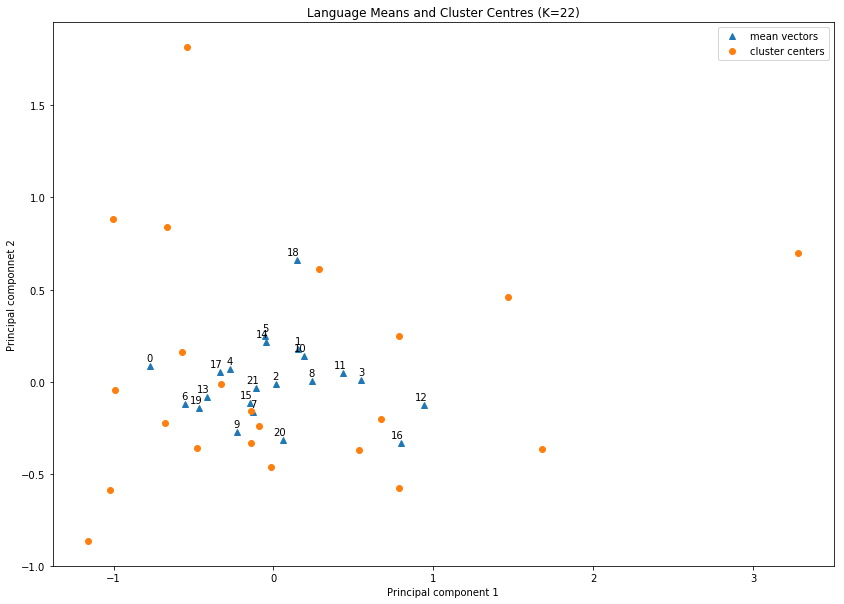

In [19]:
plt.figure(figsize=(14, 10))
plt.plot(mean_vecs_transformed[:, 0], mean_vecs_transformed[:, 1], '^', label="mean vectors")
plt.plot(clusters_transformed[:, 0], clusters_transformed[:, 1], 'o', label="cluster centers")

for i in range(22):
    plt.annotate(i, xy=(mean_vecs_transformed[i]), xytext=(3, 3), textcoords='offset points', ha='right', va='bottom')
    
plt.xlabel("Principal component 1")
plt.ylabel("Principal componnet 2")
plt.title("Language Means and Cluster Centres (K=22)")
plt.legend()
plt.savefig("results/3_2.png")
plt.show()

### 3.3

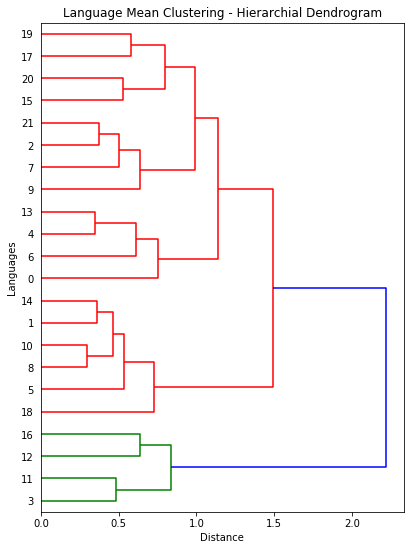

In [20]:
# 3.3
Z = hierarchy.linkage(mean_vecs, method="ward")
labels = range(22)
plt.figure(figsize=(6.5, 9))
hierarchy.dendrogram(Z, labels=labels, distance_sort="descending", orientation="right", show_leaf_counts=True)
plt.ylabel("Languages")
plt.xlabel("Distance")
plt.title("Language Mean Clustering - Hierarchial Dendrogram")
plt.savefig("results/3_3.png")
plt.show()

### 3.4

In [21]:
# 3.4
vecs = None
for k in range(22):
    kmeans_k = KMeans(n_clusters=3, random_state=1).fit(Xtrn[Ytrn == k])
    clusters_k = kmeans_k.cluster_centers_
    if vecs is None:
        vecs = clusters_k
    else:
        vecs = np.concatenate((vecs, clusters_k), axis=0)

In [24]:
vecs_ = np.array([KMeans(3, random_state=1).fit(Xtrn[Ytrn == i]).cluster_centers_ for i in range(22)])

In [28]:
vecs_ = np.concatenate(vecs_, axis=1)

In [29]:
vecs_.shape

(3, 572)

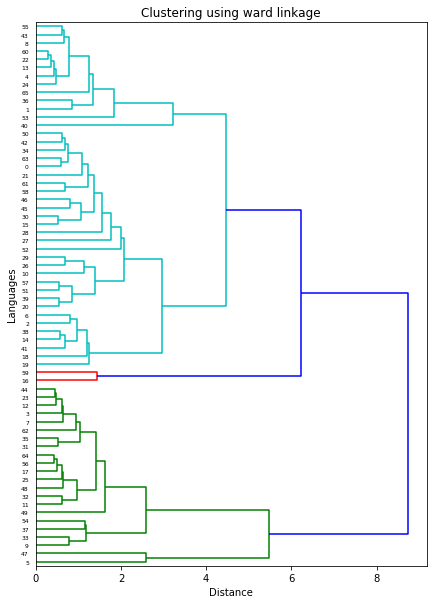

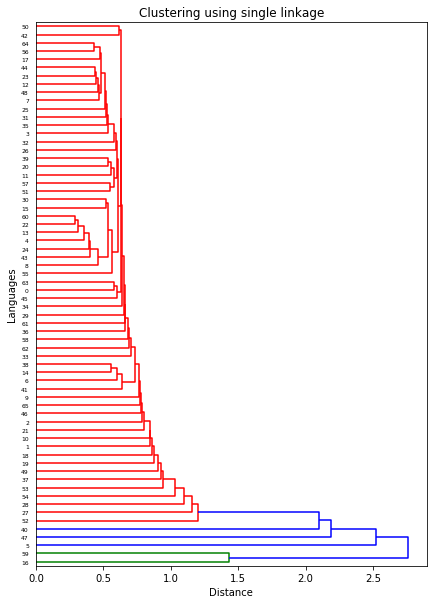

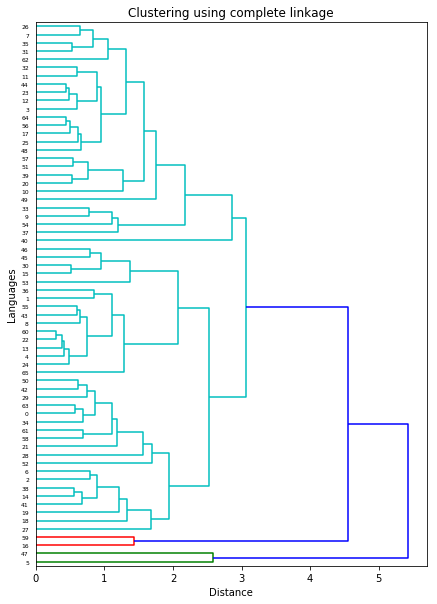

In [22]:
for method in ["ward", "single", "complete"]:
    plt.figure(figsize=(7, 10))
    Z = hierarchy.linkage(vecs, method=method)
    labels = str(range(22))
    hierarchy.dendrogram(Z, distance_sort="descending", orientation="right", show_leaf_counts=True)
    plt.title(f"Clustering using {method} linkage")
    plt.ylabel("Languages")
    plt.xlabel("Distance")
    plt.savefig(f"results/3_4_{method}.png")
    plt.show()

### 3.5

In [23]:
# 3.5
language_0 = Xtrn[Ytrn == 0]
language_0_test = Xtst[Ytst == 0]

In [24]:
log_likelihoods_ = []
cv_types = ["diag", "full"]
n_components = np.array([1, 3, 5, 10, 15])
for n in n_components:
    for cv_type in cv_types:
        gmm_n = GaussianMixture(n_components=n, covariance_type=cv_type, random_state=1).fit(language_0)
        log_likelihoods_.extend([gmm_n.score(language_0), gmm_n.score(language_0_test)])
    

In [25]:
log_likelihoods_

[14.280416117561785,
 13.842923924145325,
 16.39360043614829,
 15.810511543142642,
 15.398429743214338,
 15.040748265063943,
 18.08600493814516,
 17.066076255632257,
 16.01038876179638,
 15.908546100076155,
 19.03572395191873,
 16.48942646374156,
 16.916504763220768,
 16.567565210557202,
 21.062020341621178,
 14.621763240167148,
 17.504626881181647,
 16.901679478390964,
 22.78602299592489,
 11.847976289631205]

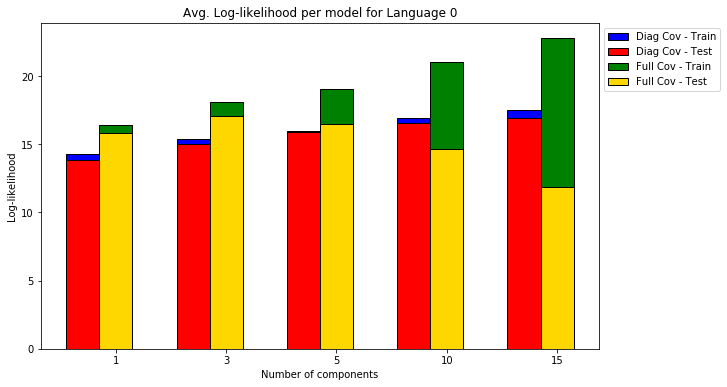

In [26]:
w = 0.3
xi = np.arange(len(n_components))
y = log_likelihoods_[0::4]
z = log_likelihoods_[1::4]
k = log_likelihoods_[2::4]
l = log_likelihoods_[3::4]

plt.figure(figsize=(10, 6))

plt.bar(xi - w, y, width=w, color='b', align='center', edgecolor="k", label= "Diag Cov - Train")
plt.bar(xi - w, z, width=w, color='r', align='center', edgecolor="k", label= "Diag Cov - Test")
plt.bar(xi, k, width=w, color='g', align='center', edgecolor="k", label= "Full Cov - Train")
plt.bar(xi, l, width=w, color='gold', align='center', edgecolor="k", label= "Full Cov - Test")

plt.xticks(xi, n_components)
plt.ylabel("Log-likelihood")
plt.xlabel("Number of components")
plt.title("Avg. Log-likelihood per model for Language 0")
lgnd = plt.legend(bbox_to_anchor=(1, 1))

plt.savefig("results/3_5.png", bbox_extra_artists=[lgnd], bbox_inches="tight")
plt.show()